In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 1. 拓扑序列(topological sequence) 和 关键路径(critical path)
# Activity on edge network(AOE), 顶点表示事件或状态，有向边表示活动
DG = nx.DiGraph()  # 创建：空的 有向图
DG.add_weighted_edges_from([(1, 2, 5), (1, 3, 10), (1, 4, 11),
                            (2, 5, 4),
                            (3, 4, 4), (3, 5, 0),
                            (4, 6, 15),
                            (5, 6, 21), (5, 7, 25), (5, 8, 35),
                            (6, 7, 0), (6, 8, 20),
                            (7, 8, 15)])  # 向图中添加多条赋权边: (n1,n2,weight)

lenNodes = len(DG.nodes) # 顶点数量
topoSeq = list(nx.topological_sort(DG)) # 拓扑序列
nodeCP = list(nx.dag_longest_path(DG))  # 关键路径（节点）
lenCP = nx.dag_longest_path_length(DG)  # 关键路径的长度
edgesCP=[]
for k in range(1,len(nodeCP)):
    edgesCP.append((nodeCP[k-1],nodeCP[k]))

print("拓扑序列：{}".format(topoSeq))  # [1, 3, 4, 2, 5, 6, 7, 8]
print("关键路径的顶点：{}".format(nodeCP))  # [1, 3, 5, 6, 8]
print("关键路径的边：{}".format(edgesCP))  # [(1, 3), (3, 5), (5, 6), (6, 8)]
print("关键路径长度：{}".format(lenCP))  # 51

fig, ax = plt.subplots(figsize=(8,6))
pos = {1:(0,4), 2:(5,7), 3:(5,4), 4:(5,1), 5:(10,7), 6:(10,1), 7:(15,4), 8:(20,4)}  # 指定顶点位置
edgesDG = DG.edges
edgesDashed = [(3,5),(6,7)]
edgesSolid = list(set(edgesDG)-set(edgesDashed))
labels = nx.get_edge_attributes(DG, 'weight')
# nx.draw(DG, pos, with_labels=True, node_color='skyblue')  # 绘制有向图
nx.draw_networkx_nodes(DG, pos, node_color='orange',node_size=400)  # 设置指定顶点的颜色、宽度
nx.draw_networkx_labels(DG, pos)  # 设置指定顶点的标签
nx.draw_networkx_edges(DG, pos, edgelist=edgesSolid, edge_color='dimgrey', style='solid')  # 设置指定边的颜色、线型
nx.draw_networkx_edges(DG, pos, edgelist=edgesDashed, edge_color='grey', style='dashed')  # 设置指定边，虚线
nx.draw_networkx_edge_labels(DG, pos, edge_labels=labels, font_color='dimgrey')  # 显示边的权值
ax.set_title("Project network graph by youcans@xupt")
ax.text(16, 0, "youcans-xupt", color='gainsboro')
plt.xlim(-2, 22)
plt.ylim(-1, 9)
plt.axis('on')
plt.show()  # YouCans, XUPT

In [ ]:
from model.topo import Topo
import matplotlib.pyplot as plt
import networkx as nx

lstopo = Topo('leaf-spine')
lsgraph = lstopo.getGraph()
nx.draw(lsgraph, with_labels=True, )
plt.show()

In [ ]:
import numpy as np

def generate_random_numbers():
    # 生成符合正态分布的随机数
    random_numbers = np.random.normal(loc=3.3, scale=1.0, size=3)

    # 调整随机数，使其总和为10
    adjusted_numbers = random_numbers / np.sum(random_numbers) * 10

    rounded_integers = np.ceil(adjusted_numbers)

    diff = 10 - int(np.sum(rounded_integers))

    rounded_integers[0] += diff

    return rounded_integers

result = generate_random_numbers()
print("生成的随机数:", result)
print("总和:", np.sum(result))

result = [int(x) for x in result]
dag_list = []
dag_num = 1
for i in range(3):
    dag_list.append(list(range(dag_num, dag_num + result[i])))
    dag_num += result[i]
print(dag_list)

In [ ]:
from model.topo import Topo
import networkx as nx
import random
topo = Topo()
topo.initRandomTopo()

In [ ]:
topo.plotTopo()
print(topo.nodes)
print(topo.into_degree)

In [ ]:
source_list = [node for node, ind in zip(topo.nodes, topo.into_degree) if ind == 0]
print(source_list)
select_source = random.sample(source_list, min(random.randint(1, 3), len(source_list)))
print(select_source)
destination_list = [node for node, outd in zip(topo.nodes, topo.out_degree) if outd == 0]
select_dst = random.sample(destination_list, 1)
print(select_dst)

In [ ]:
from collections import deque
from model.flow import edges_to_nodes

g = topo.graph
alt_dst = set()
paths = []
# BFS
for source in select_source:
    visited = set()
    queue = deque([source])
    while queue:
        current_node = queue.popleft()
        neighbor_edges = g.edges(current_node)
        neighbor_nodes = [x for x in edges_to_nodes(neighbor_edges) if x != current_node]
        if current_node not in visited:
            visited.add(current_node)
            queue.extend(neighbor_nodes)
    print(visited)
    dst = set(destination_list) & visited
    print(dst)
    if not alt_dst:
        alt_dst = dst
    else:
        alt_dst = alt_dst & dst
    paths.append(list(visited))
dst = random.sample(list(alt_dst), 1)
print(dst)

task_nodes = set()
for path in paths:
    visited = set()
    queue = deque(dst)
    while queue:
        current_node = queue.popleft()
        neighbor_edges = g.in_edges(current_node)
        neighbor_nodes = [x for x in edges_to_nodes(neighbor_edges) if x != current_node]
        neighbor_nodes = set(neighbor_nodes) & set(path)
        if current_node not in visited:
            visited.add(current_node)
            queue.extend(neighbor_nodes)
    print(visited)
    if not task_nodes:
        task_nodes = visited
    else:
        task_nodes = task_nodes | visited

print(f'task_nodes: ', task_nodes)

In [ ]:
sub_g = nx.subgraph(g, task_nodes)
nx.draw_networkx(sub_g, arrows=True, pos=topo._position)

In [ ]:
from model.topo import Topo
from model.flow import TaskFlowGenerator, CoFlow
import networkx as nx
import matplotlib.pyplot as plt

topo = Topo(weighted=True)
generator = TaskFlowGenerator(topo)
flowlist = generator.flowGenerate(nums=3)

plt.subplot(221)
nx.draw_networkx(topo.graph, arrows=True, pos=topo.position)
plt.subplot(222)
nx.draw_networkx(flowlist[0], arrows=True, pos=topo.position)
plt.subplot(223)
nx.draw_networkx(flowlist[1], arrows=True, pos=topo.position)
plt.subplot(224)
nx.draw_networkx(flowlist[2], arrows=True, pos=topo.position)

In [ ]:
list(nx.all_simple_paths(flowlist[0], 6, 26))

In [ ]:
coflows = []
for i, flow in enumerate(flowlist):
    coflows.append(CoFlow(i, topo, flow))

for coflow in coflows:
    print(coflow.edges)
    print(coflow.paths)

In [ ]:
[generation for generation in nx.topological_generations(flowlist[1])]

In [ ]:
topoSeq = list(nx.topological_sort(flowlist[1]))
print(topoSeq)
print(topoSeq[::-1])

In [ ]:
criticalPath = list(nx.dag_longest_path(flowlist[1]))
print(criticalPath)

In [ ]:
print(coflows[1].etv)
print(coflows[1].ltv)
print(coflows[1].ete)
print(coflows[1].lte)
print(coflows[1].cp)

In [ ]:
from model.flow import get_ops

ops, flow_ops = get_ops(coflows)
for op in ops:
    print(op, op.edge, op.flow)
for path_ops in flow_ops:
    print(path_ops)

In [ ]:
import pulp as pl

solver_list = pl.listSolvers()
print(solver_list)

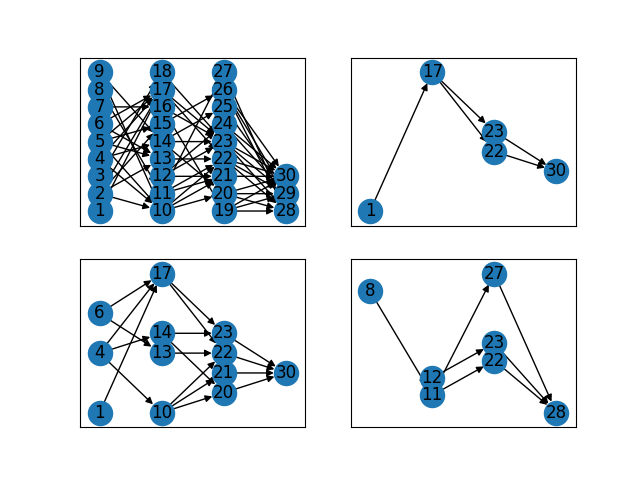

In [3]:
import logging
from model.problem import CFSProblem
from model.solution import CFSSolution
from solver.pulp import PuLPSolver
from model.topo import Topo
from model.flow import TaskFlowGenerator, CoFlow
from model.flow import get_ops
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib widget

def print_intermediate_solution(solution:CFSSolution):
    logging.info(f'Makespan: {solution.makespan}')

topo = Topo(weighted=True)
generator = TaskFlowGenerator(topo)
flowlist = generator.flowGenerate(nums=3)

plt.subplot(221)
nx.draw_networkx(topo.graph, arrows=True, pos=topo.position)
plt.subplot(222)
nx.draw_networkx(flowlist[0], arrows=True, pos=topo.position)
plt.subplot(223)
nx.draw_networkx(flowlist[1], arrows=True, pos=topo.position)
plt.subplot(224)
nx.draw_networkx(flowlist[2], arrows=True, pos=topo.position)

coflows = []
for i, flow in enumerate(flowlist):
    coflows.append(CoFlow(i, topo, flow))

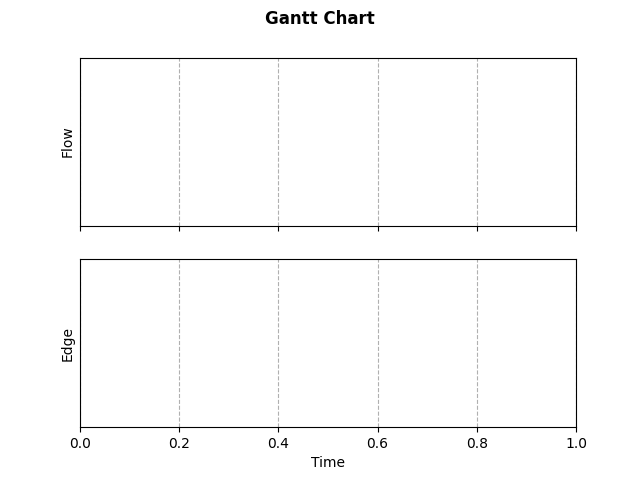

[2024-02-13 14:48:08 MainThread_pulp] Makespan: 616.00000000001


----------------------------------------
Problem: 20 flows, 53 edges
Optimum: None
Solution: 616.00000000001
Terminate successfully in 2.0 sec.


In [2]:
ops, path_ops = get_ops(coflows)
problem = CFSProblem(path_ops=path_ops, ops=ops)
s = PuLPSolver(solver_name='CPLEX', max_time=60)
s.solve(problem=problem, interval=2000, callback=print_intermediate_solution)
s.wait()
print('----------------------------------------')
if s.status:
    print(f'Problem: {len(problem.flows)} flows, {len(problem.edges)} edges')
    print(f'Optimum: {problem.optimum}')
    print(f'Solution: {problem.solution.makespan}')
    print(f'Terminate successfully in {s.user_time} sec.')
else:
    print(f'Solving process failed in {s.user_time} sec.')

In [ ]:
for op in problem.solution.ops:
    print(op, op.source.edge, (op.source.edge.pred_node, op.source.edge.succ_node), op.start_time)

In [3]:
sum = 0
for op in problem.solution.ops:
    sum += op.source.duration
print(sum)

4176


In [12]:
import os, json

topo = Topo(load_topo_name=str(1))
instance_path = 'benchmark/instances/dag30_120'
with open(instance_path, 'r') as f:
    instance_detail = json.load(f)

In [16]:
coflows = [CoFlow(f["flowid"], topo, nx.DiGraph(f["edges"])) for f in instance_detail["flows"]]
for coflow in coflows:
    print(coflow.edges)

[WeightedEdge(23), WeightedEdge(20), WeightedEdge(16)]
[WeightedEdge(11), WeightedEdge(1), WeightedEdge(12), WeightedEdge(13), WeightedEdge(7), WeightedEdge(14), WeightedEdge(9), WeightedEdge(2)]
[WeightedEdge(7), WeightedEdge(10), WeightedEdge(14)]
[WeightedEdge(0), WeightedEdge(1), WeightedEdge(11), WeightedEdge(14), WeightedEdge(7), WeightedEdge(9), WeightedEdge(2)]
[WeightedEdge(12), WeightedEdge(13), WeightedEdge(1), WeightedEdge(7), WeightedEdge(26), WeightedEdge(27), WeightedEdge(9), WeightedEdge(2), WeightedEdge(42)]
[WeightedEdge(1), WeightedEdge(3), WeightedEdge(12)]
[WeightedEdge(7), WeightedEdge(8), WeightedEdge(5)]
[WeightedEdge(0), WeightedEdge(1), WeightedEdge(2)]
[WeightedEdge(49)]
[WeightedEdge(0), WeightedEdge(1), WeightedEdge(18), WeightedEdge(6), WeightedEdge(3), WeightedEdge(38), WeightedEdge(34)]
[WeightedEdge(7), WeightedEdge(8), WeightedEdge(17)]
[WeightedEdge(48)]
[WeightedEdge(14), WeightedEdge(7), WeightedEdge(10), WeightedEdge(39)]
[WeightedEdge(44)]
[Weight

In [1]:
from jsp_fwk.model.problem import JSProblem
from jsp_fwk.model.solution import JSSolution
import random

problem = JSProblem(benchmark='ft06')
solution = JSSolution(problem=problem)
head_ops = solution.imminent_ops
print(head_ops)
for op in head_ops:
    print(op.source.job, op.source.machine, op.source.duration, op.start_time)

[OperationStep(0), OperationStep(6), OperationStep(12), OperationStep(18), OperationStep(24), OperationStep(30)]
Job(0) Machine(2) 1 0.0
Job(1) Machine(1) 8 0.0
Job(2) Machine(2) 5 0.0
Job(3) Machine(1) 5 0.0
Job(4) Machine(2) 9 0.0
Job(5) Machine(1) 3 0.0


In [3]:
op_t = random.choice(head_ops)
solution.dispatch(op_t)

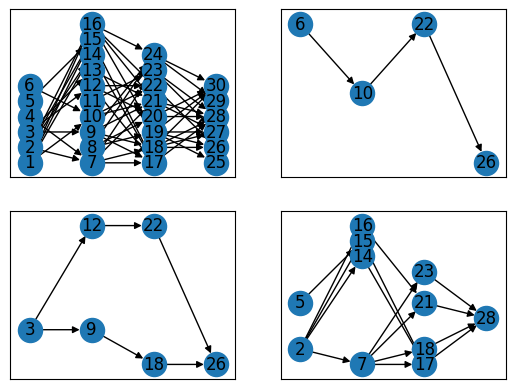

In [1]:
from model.problem import CFSProblem
from model.solution import CFSSolution
from solver.pulp import PuLPSolver
from model.topo import Topo
from model.flow import TaskFlowGenerator, CoFlow
from model.flow import get_ops
import logging
import networkx as nx
import matplotlib.pyplot as plt

def print_intermediate_solution(solution:CFSSolution):
    logging.info(f'Makespan: {solution.makespan}')

topo = Topo(weighted=True)
generator = TaskFlowGenerator(topo)
flowlist = generator.flowGenerate(nums=3)
coflows = []
for i, flow in enumerate(flowlist):
    coflows.append(CoFlow(i, topo, flow))
ops, path_ops = get_ops(coflows)

plt.subplot(221)
nx.draw_networkx(topo.graph, arrows=True, pos=topo.position)
plt.subplot(222)
nx.draw_networkx(flowlist[0], arrows=True, pos=topo.position)
plt.subplot(223)
nx.draw_networkx(flowlist[1], arrows=True, pos=topo.position)
plt.subplot(224)
nx.draw_networkx(flowlist[2], arrows=True, pos=topo.position)
plt.show()

In [2]:
problem = CFSProblem(path_ops=path_ops, ops=ops)
solution = CFSSolution(problem=problem)
head_ops = solution.imminent_ops
solution.dispatch(head_ops[0])

In [3]:
problem.update_solution(solution=solution)
print(head_ops)

[TransOperationStep(0), TransOperationStep(3), TransOperationStep(9)]


In [5]:
from model.variable import TransOperationStep
from common.graph import DirectedGraph

source, sink = TransOperationStep(), TransOperationStep()
graph = DirectedGraph()
for op in problem.solution.ops:
    if not isinstance(op.pre_flow_op, TransOperationStep):
        print(op)
        graph.add_edge(source, op)
    
    if op.next_flow_op:
        print(f'debug: op: {op}; next_flow_op {op.next_flow_op}')
        graph.add_edge(op, op.next_flow_op)
    else:
        print(f'sink op: {op}')
        graph.add_edge(op, sink)

sorted_ops = graph.sort()
print(sorted_ops)


TransOperationStep(0)
debug: op: TransOperationStep(0); next_flow_op TransOperationStep(1)
debug: op: TransOperationStep(1); next_flow_op TransOperationStep(2)
sink op: TransOperationStep(2)
TransOperationStep(3)
debug: op: TransOperationStep(3); next_flow_op TransOperationStep(4)
debug: op: TransOperationStep(4); next_flow_op TransOperationStep(5)
debug: op: TransOperationStep(5); next_flow_op TransOperationStep(6)
debug: op: TransOperationStep(6); next_flow_op TransOperationStep(7)
debug: op: TransOperationStep(7); next_flow_op TransOperationStep(8)
sink op: TransOperationStep(8)
TransOperationStep(9)
debug: op: TransOperationStep(9); next_flow_op TransOperationStep(10)
debug: op: TransOperationStep(10); next_flow_op TransOperationStep(11)
debug: op: TransOperationStep(11); next_flow_op TransOperationStep(12)
debug: op: TransOperationStep(12); next_flow_op TransOperationStep(13)
debug: op: TransOperationStep(13); next_flow_op TransOperationStep(14)
debug: op: TransOperationStep(14); 

In [12]:
print(graph)

-1: 0,6,9
0: 1
1: 2
2: 3
3: 4
4: 5
5: -1
6: 7
7: 8
8: -1
9: 10
10: 11
11: 12
12: 13
13: 14
14: 15
15: 16
16: 17
17: -1


In [3]:
print(flowlist[0].edges)
print(nx.line_graph(flowlist[0]))
print(list(nx.topological_sort(flowlist[0])))
print(list(nx.topological_sort(nx.line_graph(flowlist[0]))))
print(list(nx.topological_generations(nx.line_graph(flowlist[0]))))
print(list(nx.dag_longest_path(flowlist[0])))

[(1, 10), (3, 10), (10, 13), (10, 17), (13, 22), (17, 22)]
DiGraph with 6 nodes and 6 edges
[1, 3, 10, 13, 17, 22]
[(1, 10), (3, 10), (10, 13), (10, 17), (13, 22), (17, 22)]
[[(1, 10), (3, 10)], [(10, 13), (10, 17)], [(13, 22), (17, 22)]]
[3, 10, 17, 22]


[2024-02-16 14:11:10 MainThread_PriorityDispatchSolver] Makespan: 440.0


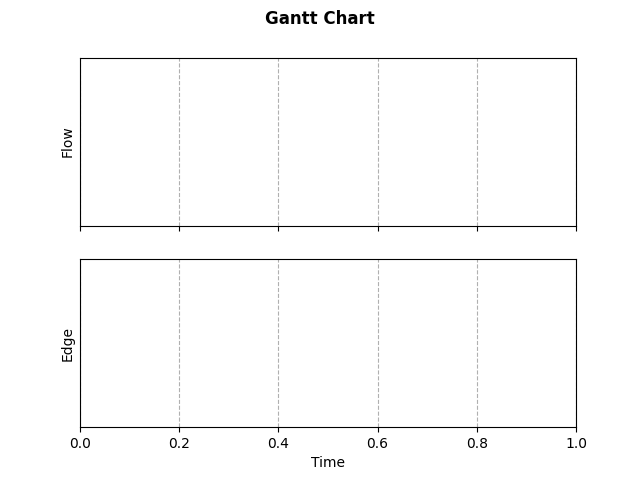

----------------------------------------
Problem: 3 flows, 19 edges
Optimum: None
Solution: 440.0
Terminate successfully in 0.0 sec.


In [3]:
from solver.dispatching_rule import PriorityDispatchSolver

%matplotlib widget
rules = ['spt', 'mopr', 'mwkr', 'hh', 'ihh']
s = PriorityDispatchSolver(rule=rules[0])

s.solve(problem=problem, interval=2000, callback=print_intermediate_solution)
s.wait()
print('----------------------------------------')
if s.status:
    print(f'Problem: {len(problem.flows)} flows, {len(problem.edges)} edges')
    print(f'Optimum: {problem.optimum}')
    print(f'Solution: {problem.solution.makespan}')
    print(f'Terminate successfully in {s.user_time} sec.')
else:
    print(f'Solving process failed in {s.user_time} sec.')

In [1]:
from model.problem import CFSProblem
from model.solution import CFSSolution
import random
import logging

def print_intermediate_solution(solution:CFSSolution):
    logging.info(f'Makespan: {solution.makespan}')

problem = CFSProblem(benchmark='dag301_40')
solution = CFSSolution(problem=problem)
head_ops = solution.imminent_ops
print(head_ops)
for op in head_ops:
    print(op.source.flow, op.source.edge, op.source.duration, op.start_time)

[TransOperationStep(0), TransOperationStep(3), TransOperationStep(8), TransOperationStep(11), TransOperationStep(13), TransOperationStep(20), TransOperationStep(23), TransOperationStep(27), TransOperationStep(33), TransOperationStep(35), TransOperationStep(38), TransOperationStep(41), TransOperationStep(47), TransOperationStep(49), TransOperationStep(52), TransOperationStep(56), TransOperationStep(58), TransOperationStep(61), TransOperationStep(62), TransOperationStep(64), TransOperationStep(67), TransOperationStep(69), TransOperationStep(72), TransOperationStep(73), TransOperationStep(76), TransOperationStep(82), TransOperationStep(85), TransOperationStep(86), TransOperationStep(90), TransOperationStep(91), TransOperationStep(97), TransOperationStep(99), TransOperationStep(101), TransOperationStep(104), TransOperationStep(107), TransOperationStep(113), TransOperationStep(114), TransOperationStep(122), TransOperationStep(126), TransOperationStep(132)]
CoFlow(0) WeightedEdge(7) 15 0.0
C

[2024-02-16 16:57:30 MainThread_PriorityDispatchSolver] Makespan: 1041.0


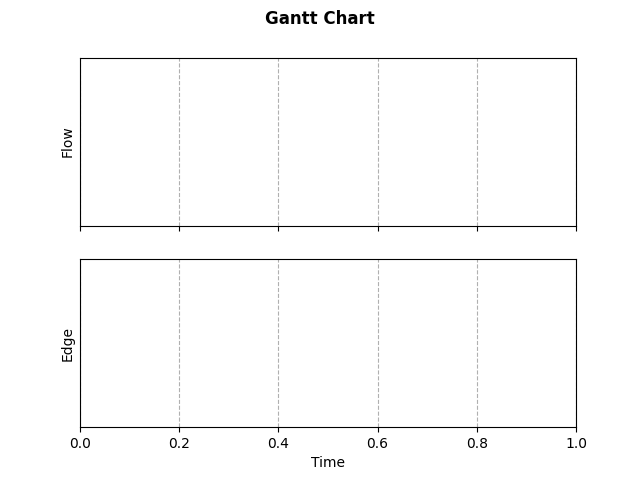

----------------------------------------
Problem: 40 flows, 16 edges
Optimum: None
Solution: 1041.0
Terminate successfully in 0.1 sec.


In [7]:
from solver.dispatching_rule import PriorityDispatchSolver

%matplotlib widget
rules = ['spt', 'lpt', 'mwkr', 'hh', 'ihh']
s = PriorityDispatchSolver(rule=rules[1])

s.solve(problem=problem, interval=2000, callback=print_intermediate_solution)
s.wait()
print('----------------------------------------')
if s.status:
    print(f'Problem: {len(problem.flows)} flows, {len(problem.edges)} edges')
    print(f'Optimum: {problem.optimum}')
    print(f'Solution: {problem.solution.makespan}')
    print(f'Terminate successfully in {s.user_time} sec.')
else:
    print(f'Solving process failed in {s.user_time} sec.')